# 决策树方法比较及其在财务舞弊识别中的应用

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from graphviz import Source
import pydotplus
from IPython.display import Image
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix 

import random
np.random.seed(42)

fraud_detection_samples=pd.read_csv("data/fraud_detection_samples.csv",dtype={"股票代码":str})
fraud_detection_samples=fraud_detection_samples.iloc[:,:-3]


fraud_detection_samples=fraud_detection_samples.fillna(0)
fraud_detection_samples.describe().T
X = np.array(fraud_detection_samples.iloc[:,3:-2])
Y = np.array(fraud_detection_samples["是否违规"])

a=np.column_stack((Y,X))

print('类别标签:', np.unique(Y))

类别标签: [0 1]


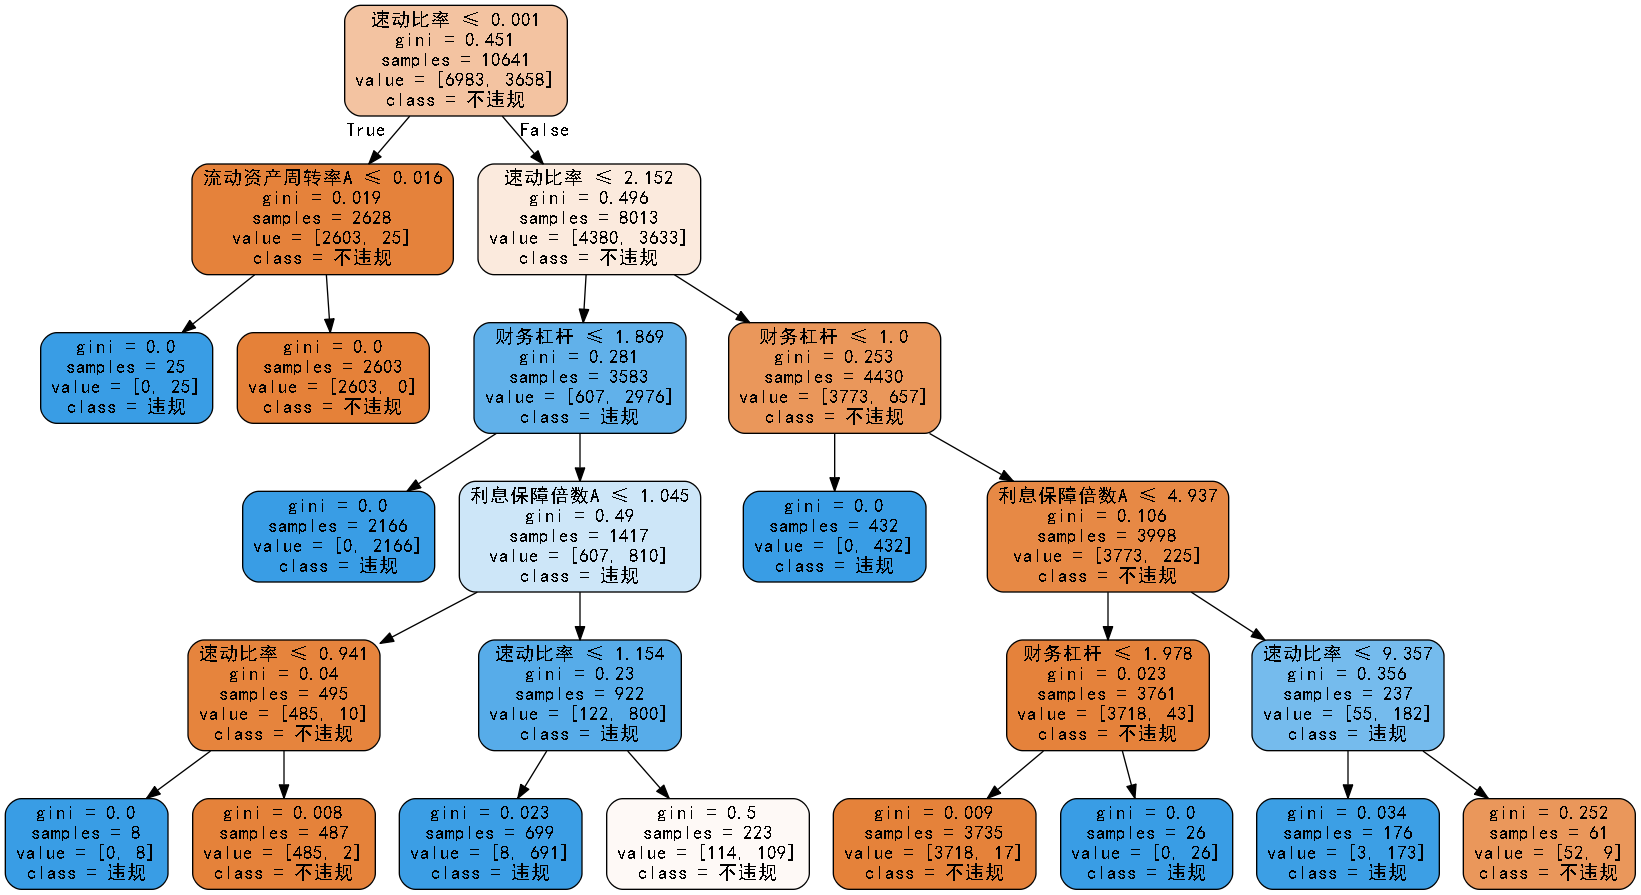

In [2]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
clf = clf.fit(X, Y)
fraud_class='不违规','违规'
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=fraud_detection_samples.iloc[:,3:-2].columns, class_names=fraud_class,filled=True, rounded=True,
                               special_characters=True,fontname='simhei')
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width=500) 

In [3]:
fraud_detection_samples.head().T

,0,1,2,3,4
股票代码,601678,600146,600146,2263,600711
截止日期,2010/12/31,2010/12/31,2010/12/31,2010/12/31,2010/12/31
行业代码,S90,C25,C25,C29,B09
财务杠杆,1.11611,1.36886,1.36886,1.39942,1.05253
经营杠杆,1.4499,2.53112,2.53112,1.66262,1.0499
综合杠杆,1.61824,3.46475,3.46475,2.32671,1.10505
应收账款与收入比,0.024363,0.182217,0.182217,0.076879,0.292157
应收账款周转率A,41.0462,5.48797,5.48797,13.0074,3.42282
存货周转率A,19.9069,1.03638,1.03638,3.57643,8.3525
营运资金（资本）周转率A,8.82957,0.375901,0.375901,5.4712,0


In [4]:
x=fraud_detection_samples[['流动比率','财务杠杆']]

In [5]:
N, M = 50, 50  # 横纵各采样多少个值
x1_min, x2_min = [0,0] #x.min()
x1_max, x2_max = [2,10] # x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print(x_show.shape)
print('x_show = \n', x_show)    

(2500, 2)
x_show = 
 [[ 0.          0.        ]
 [ 0.04081633  0.        ]
 [ 0.08163265  0.        ]
 ...
 [ 1.91836735 10.        ]
 [ 1.95918367 10.        ]
 [ 2.         10.        ]]


In [6]:
xx_train, xx_test, yy_train, yy_test = train_test_split(x, Y, test_size=0.3, stratify=Y)  #根据数据集中y的比例分配给train和test，使得train和test中各类别数据的比例与原数据集的比例一致。

In [7]:
x=np.array(x)

In [8]:
x.shape

(10641, 2)

(2500,)
[1 1 1 ... 1 1 1]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


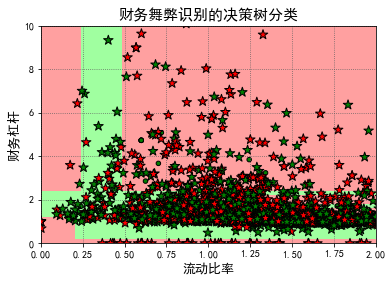

In [9]:
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    
    clf2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
    clf2 = clf2.fit(x, Y)    
    y_show_hat = clf2.predict(x_show)  # 预测值
    
    print(y_show_hat.shape)
    print(y_show_hat)
    
    y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
    print(y_show_hat)
    
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
    
    plt.scatter(np.array(xx_test)[:,0], np.array(xx_test)[:,1], c=yy_test.ravel(), edgecolors='k', s=100, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
    plt.scatter(x[:100,0], x[:100,1], c=Y.ravel()[:100], edgecolors='k', s=20, cmap=cm_dark)  # 全部数据
    plt.xlabel('流动比率', fontsize=13)
    plt.ylabel('财务杠杆', fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True, ls=':', color='#606060')
    plt.title('财务舞弊识别的决策树分类', fontsize=15)
    plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)  #根据数据集中y的比例分配给train和test，使得train和test中各类别数据的比例与原数据集的比例一致。
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5)
clf = clf.fit(X_train, y_train)
y_hat=clf.predict(X_test)
y_hat_proba=clf.predict_proba(X_test)

In [11]:
fpr,tpr,threshold = roc_curve(y_test, y_hat_proba[:,1],drop_intermediate =True) #要理解TPR、FPR的含义

AUC is: 0.9923095148045264


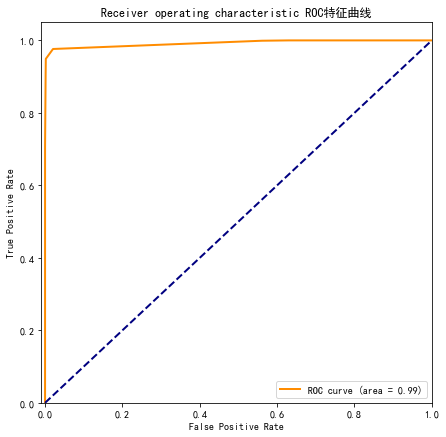

In [12]:
roc_auc = auc(fpr,tpr)
print("AUC is:",roc_auc)
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc) #假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC特征曲线')
plt.legend(loc="lower right")
plt.show()

In [13]:
roc_auc

0.9923095148045264

In [14]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

##  基础决策树分类效果

决策树结果： 0.9796463557993731
分类效果的混淆矩阵
[[2052   43]
 [  26 1072]]


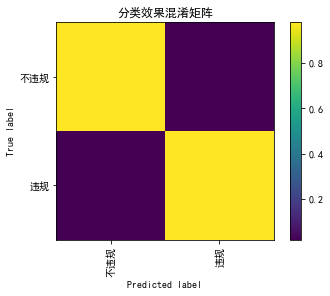

In [15]:
from sklearn.tree import DecisionTreeClassifier
seed = 42
kfold = KFold(n_splits=10, shuffle=True,random_state=seed)
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5)  #分类树的基本模型，将被后面的集成模型所使用
dtree = dtree.fit(X_train, y_train)
result = cross_val_score(dtree, X_test, y_test, cv=kfold)
print("决策树结果：",result.mean())

y_hat=dtree.predict(X_test)
y_hat_proba=dtree.predict_proba(X_test)

cm = confusion_matrix(y_test, y_hat)
print('分类效果的混淆矩阵\r')
print(cm)
plot_confusion_matrix(cm, fraud_class, "分类效果混淆矩阵")
plt.show()

Text(35.0, 0.5, 'True label')

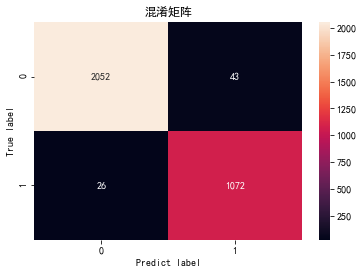

In [16]:
#也可以直接调用seaborn的方法出混淆矩阵图

f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax,fmt='d') #画热力图
ax.set_title('混淆矩阵') #标题
ax.set_xlabel('Predict label') #x轴
ax.set_ylabel('True label') #y轴

##  随机森林分类效果

RandomForestClassifier随机森林分类结果: 0.9899305405210364


Text(35.0, 0.5, 'True label')

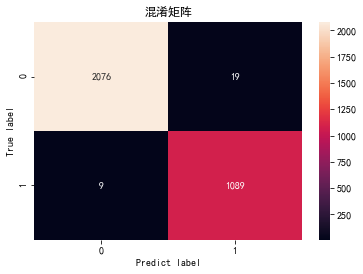

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, max_depth=None,
    min_samples_split=2, random_state=0)
rfc=rfc.fit(X_train, y_train)
scores = cross_val_score(rfc, X_train, y_train,cv=kfold)
print("RandomForestClassifier随机森林分类结果:",scores.mean())


y_hat=rfc.predict(X_test)
y_hat_proba=rfc.predict_proba(X_test)

cm = confusion_matrix(y_test, y_hat)
f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax,fmt='d') #画热力图
ax.set_title('混淆矩阵') #标题
ax.set_xlabel('Predict label') #x轴
ax.set_ylabel('True label') #y轴

## 装袋法BaggingClassifier 分类效果

装袋法提升后结果： 0.9845596088619469


Text(35.0, 0.5, 'True label')

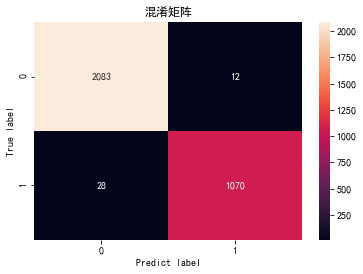

In [18]:
from sklearn.ensemble import BaggingClassifier 
bcmodel = BaggingClassifier(base_estimator=dtree, n_estimators=20, random_state=seed)
bcmodel=bcmodel.fit(X_train, y_train)
result = cross_val_score(bcmodel, X_train, y_train, cv=kfold)
print("装袋法提升后结果：",result.mean())


y_hat=bcmodel.predict(X_test)
y_hat_proba=bcmodel.predict_proba(X_test)

cm = confusion_matrix(y_test, y_hat)
f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax,fmt='d') #画热力图
ax.set_title('混淆矩阵') #标题
ax.set_xlabel('Predict label') #x轴
ax.set_ylabel('True label') #y轴

## 提升法AdaBoostClassifier分类效果

提升法改进结果： 0.9914057876885328


Text(35.0, 0.5, 'True label')

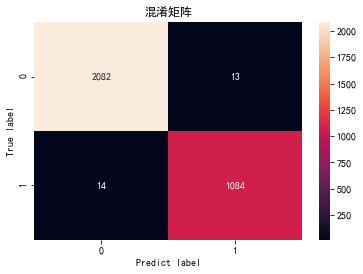

In [19]:
from sklearn.ensemble import AdaBoostClassifier
abc_model = AdaBoostClassifier(base_estimator=dtree, n_estimators=20,random_state=seed)
abc_model=abc_model.fit(X_train, y_train)
result = cross_val_score(abc_model, X_train, y_train, cv=kfold)
print("提升法改进结果：",result.mean())

y_hat=abc_model.predict(X_test)
y_hat_proba=abc_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_hat)
f,ax=plt.subplots()
sns.heatmap(cm,annot=True,ax=ax,fmt='d') #画热力图
ax.set_title('混淆矩阵') #标题
ax.set_xlabel('Predict label') #x轴
ax.set_ylabel('True label') #y轴